In [1]:
## Libraries

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_price.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [4]:
df.shape

(215909, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215909 entries, 0 to 215908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215909 non-null  int64  
 1   insert_date  215909 non-null  object 
 2   origin       215909 non-null  object 
 3   destination  215909 non-null  object 
 4   start_date   215909 non-null  object 
 5   end_date     215909 non-null  object 
 6   train_type   215909 non-null  object 
 7   price        202321 non-null  float64
 8   train_class  215266 non-null  object 
 9   fare         215266 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 16.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0         0
insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [7]:
df.describe(include='all')

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,2.159090e+05,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,NaN,30543,5,5,2231,2870,16,NaN,5,5
top,NaN,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,NaN,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,1.303185e+06,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,6.071288e+05,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,7.020000e+02,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,9.026100e+05,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,1.427927e+06,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,1.575116e+06,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


# Data Analysis

- From above, we can see there are lot of null values in the feature price and some in train_class and fare, so we have to fill the null values of price feature and we can drop the null values of train_class and fare because of less values.
- Change the dtype of start_date, end_date, insert_date.
- Make different columns for date, month, year, hours, minutes and seconds.
- Dropping features of not use.

In [8]:
# Dropping the Unnamed feature which is not of use.

df.drop(columns=['Unnamed: 0','insert_date'], inplace=True)

## Addition Features

Making separate features from insert_date, start_date, end_date for month, day, hour and month for visualisation using pandas library (pd.to_datetime) and extracting feature values using datetime library (dt).

In [9]:
## Extracting values from start_date feature to create separate features for every time stamps

# Extracting month
df['start_month'] = pd.to_datetime(df.start_date).dt.month

# Extracting day
df['start_day'] = pd.to_datetime(df.start_date).dt.day

# Extracting hours
df['start_hours'] = pd.to_datetime(df.start_date).dt.hour

# Extracting minutes
df['start_minutes'] = pd.to_datetime(df.start_date).dt.minute


# Dropping the feature start_date which is not of use.
df.drop(columns=['start_date'], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
## Extracting values from end_date feature to create separate features for every time stamps
## Similiar like start_date features we can extract values for end_date feature.

# Extracting month
df['end_month'] = pd.to_datetime(df.end_date).dt.month

# Extracting day
df['end_day'] = pd.to_datetime(df.end_date).dt.day

# Extracting hours
df['end_hours'] = pd.to_datetime(df.end_date).dt.hour

# Extracting minutes
df['end_minutes'] = pd.to_datetime(df.end_date).dt.minute


# Dropping the feature end_date which is not of use.
df.drop(columns=['end_date'], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df.head()

,origin,destination,train_type,price,train_class,fare,start_month,start_day,start_hours,start_minutes,end_month,end_day,end_hours,end_minutes
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,6,2,15,0,6,2,19,42
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,6,2,17,15,6,2,23,3
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,6,2,17,15,6,2,23,10
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,6,2,17,15,6,2,22,14
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,6,2,18,55,6,2,23,3


## Numerical features EDA

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [13]:
df[numerical_features].head()

,price,start_month,start_day,start_hours,start_minutes,end_month,end_day,end_hours,end_minutes
0,59.50,6,2,15,0,6,2,19,42
1,34.65,6,2,17,15,6,2,23,3
2,39.95,6,2,17,15,6,2,23,10
3,40.60,6,2,17,15,6,2,22,14
4,27.90,6,2,18,55,6,2,23,3


In [14]:
## Checking the unique values of numerical features.

print('******************************************************************************************************')
for i in numerical_features:
    print(f'Number of unique values in {i} feature: {df[i].nunique()}\n')
    print('******************************************************************************************************')

******************************************************************************************************
Number of unique values in price feature: 141

******************************************************************************************************
Number of unique values in start_month feature: 1

******************************************************************************************************
Number of unique values in start_day feature: 29

******************************************************************************************************
Number of unique values in start_hours feature: 19

******************************************************************************************************
Number of unique values in start_minutes feature: 28

******************************************************************************************************
Number of unique values in end_month feature: 1

*******************************************************************************

## Plotting the Dependent Feature (Price)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Price Distribution')

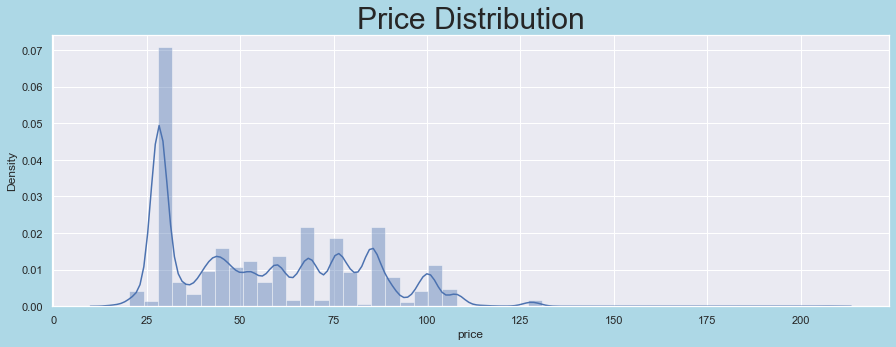

In [15]:
## For background color.
sns.set(rc={'figure.facecolor':'LightBlue'})

## plotting the price feature for distribution.
plt.figure(figsize=(15,5))
sns.distplot(df['price'])
plt.title('Price Distribution', fontsize=30)

So the most of the ticket are from **20-30** range.

### So, there are two types of Numerical features: Discrete(Whole numbers) and Continuous(decimal numbers)

## Discrete features........

In [16]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print('Discrete variables Count: {}'.format(len(discrete_features)))

Discrete variables Count: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

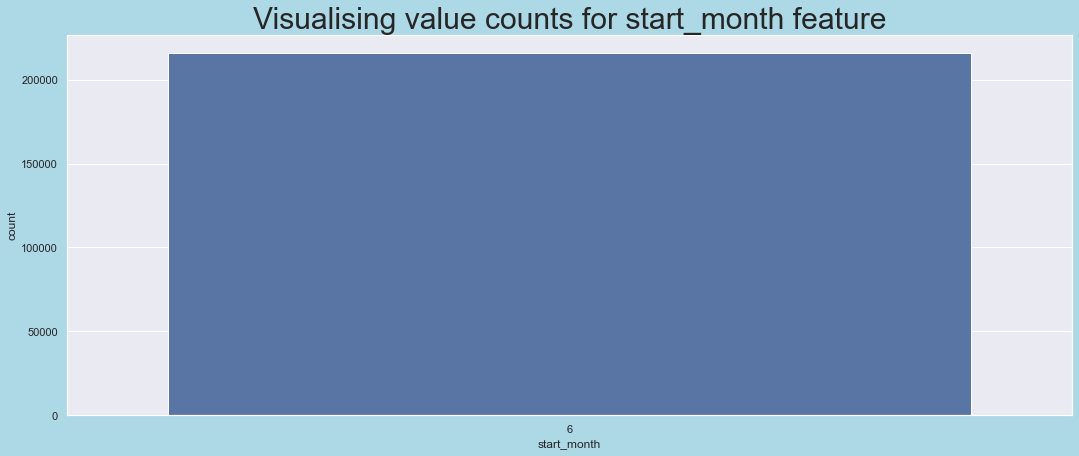

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

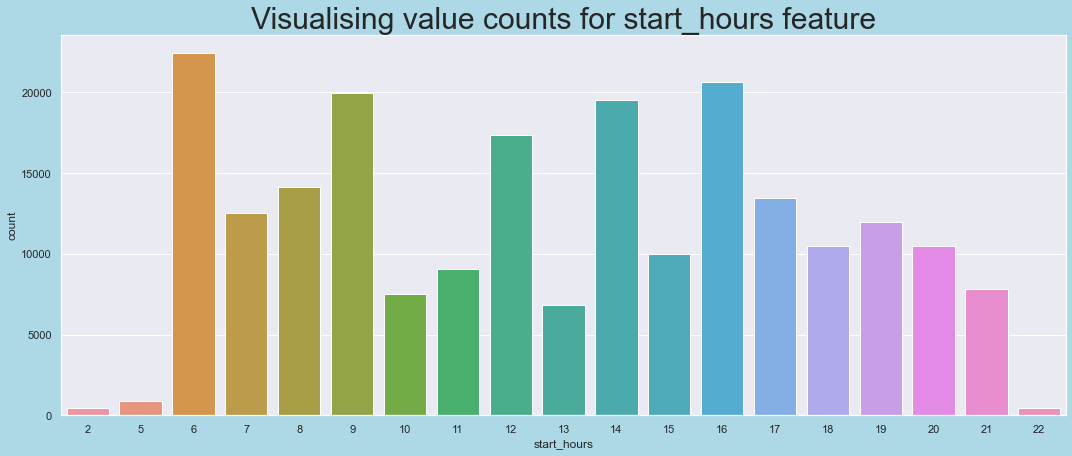

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

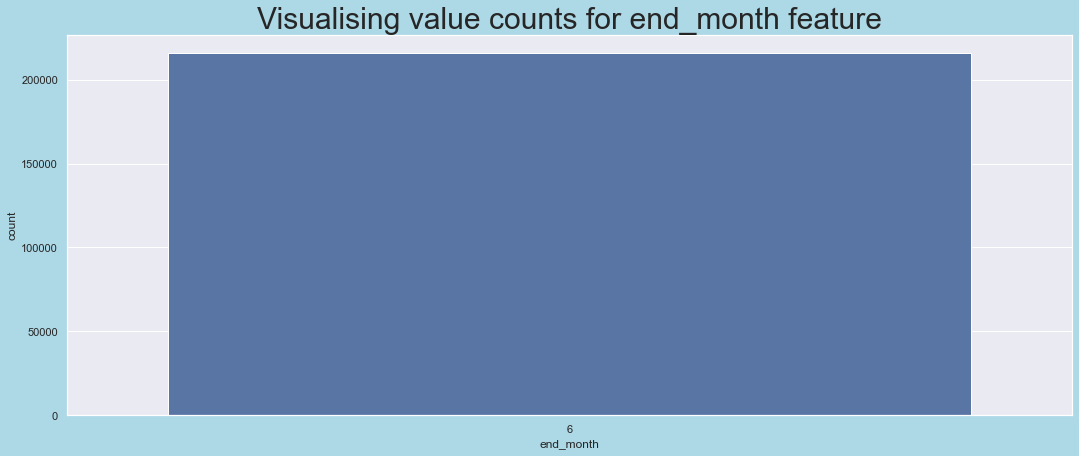

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

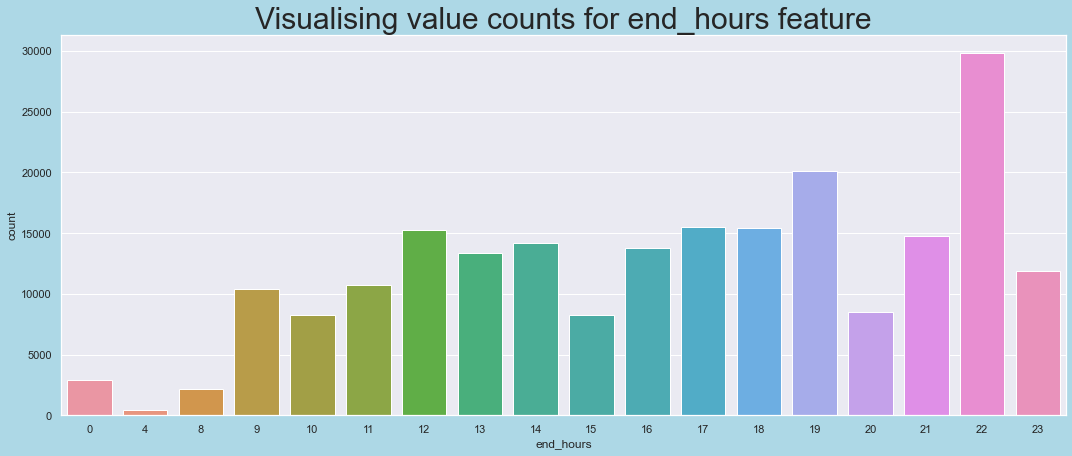

In [17]:
## Discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]

## value counts on discrete feature.
for feature in discrete_features:
    plt.figure(figsize=(18,7))
    sns.countplot(x=feature, data=df)
    plt.title(f'Visualising value counts for {feature} feature', fontsize=30)
    plt.show()

## Continuous features......

In [18]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous feature count: {}".format(len(continuous_features)))

Continuous feature count: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

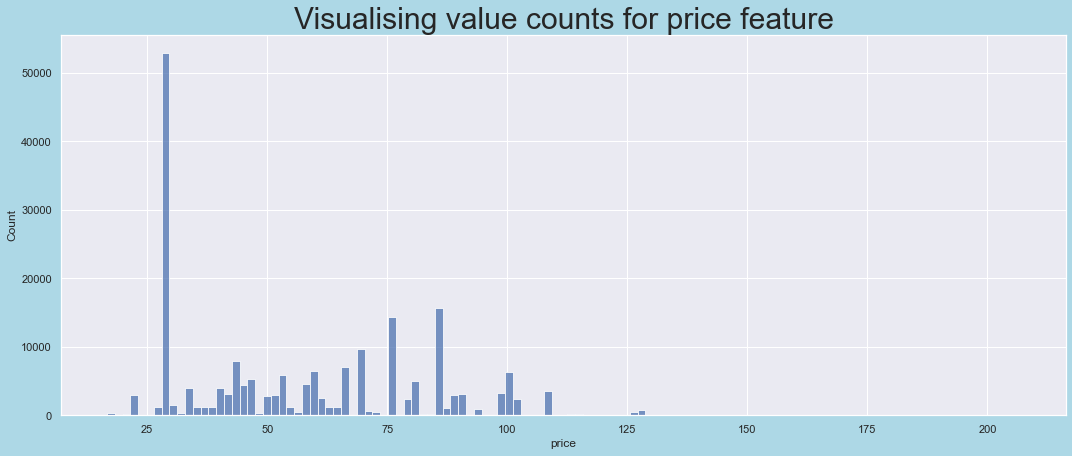

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

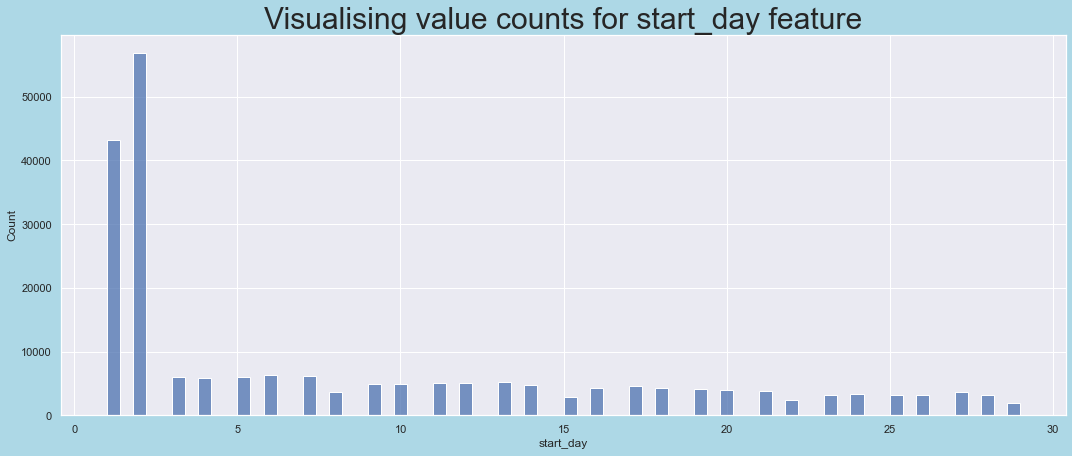

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

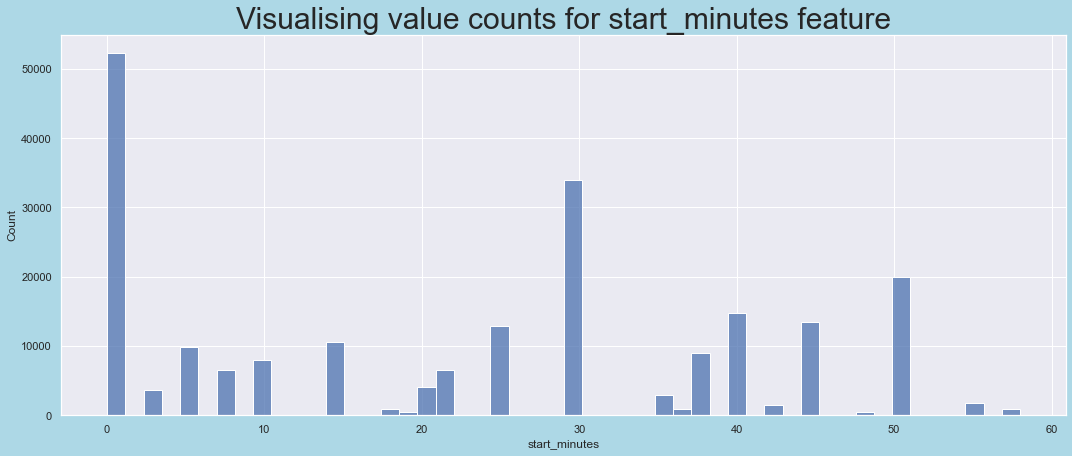

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

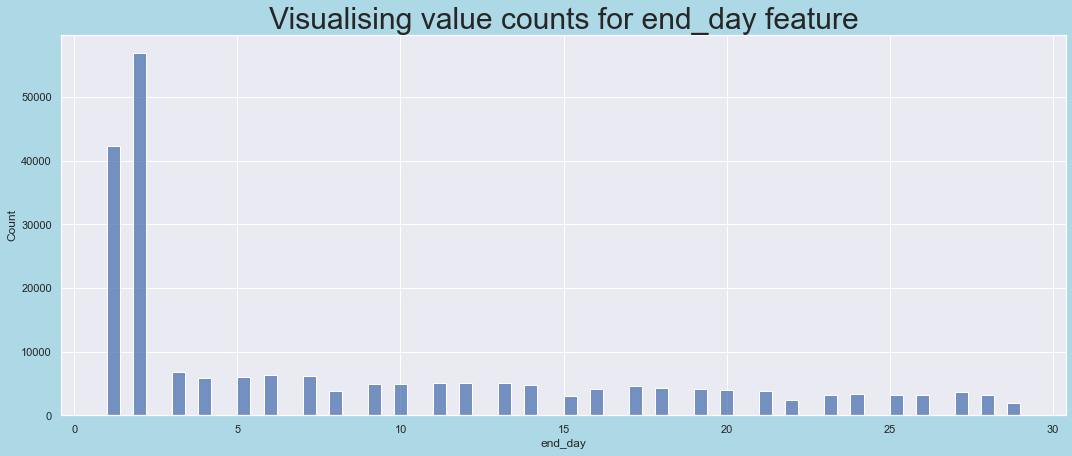

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

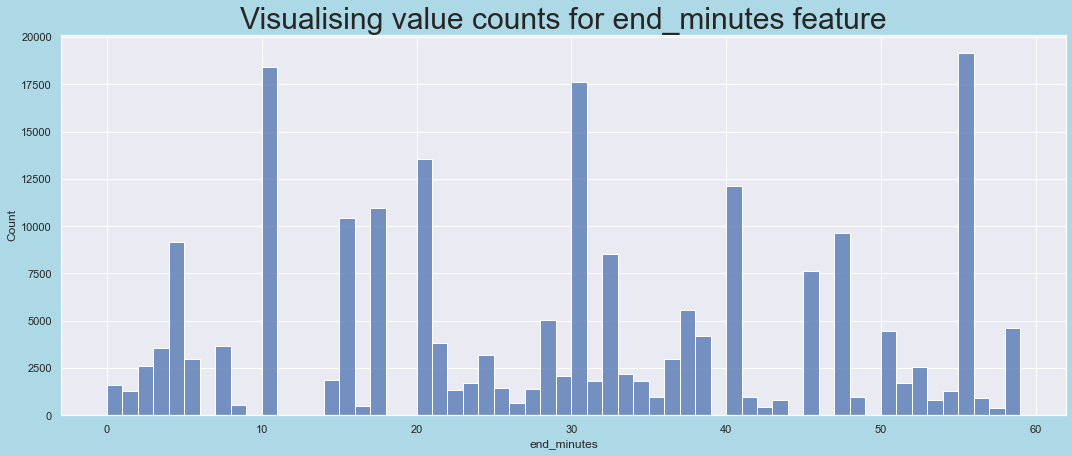

In [19]:
# value_counts for numerical columns.

for feature in continuous_features:
    plt.figure(figsize=(18,7))
    sns.histplot(data=df, x=feature)
    plt.title(f'Visualising value counts for {feature} feature', fontsize=30)
    plt.show()

## So from above countplots:

- So most of the train are on first week of the June month.

## Categorical features EDA

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [21]:
categorical_features

['origin', 'destination', 'train_type', 'train_class', 'fare']

In [22]:
df[categorical_features].head()

,origin,destination,train_type,train_class,fare
0,PONFERRADA,MADRID,MD-AVE,Turista con enlace,Flexible
1,PONFERRADA,MADRID,MD-AVE,Turista con enlace,Promo +
2,PONFERRADA,MADRID,MD-LD,Turista con enlace,Promo +
3,PONFERRADA,MADRID,MD-AVE,Turista con enlace,Promo +
4,PONFERRADA,MADRID,ALVIA,Turista,Promo


In [23]:
## Checking the value counts for each features.

print('******************************************************************************************************')
for i in categorical_features:
    print(f'Value Counts in {i} feature:')
    print('******************************************************************************************************')
    print(f'{df[i].value_counts()}\n')
    print('******************************************************************************************************')

******************************************************************************************************
Value Counts in origin feature:
******************************************************************************************************
MADRID        110440
BARCELONA      39479
VALENCIA       36297
SEVILLA        27112
PONFERRADA      2581
Name: origin, dtype: int64

******************************************************************************************************
Value Counts in destination feature:
******************************************************************************************************
MADRID        105469
BARCELONA      41146
VALENCIA       39447
SEVILLA        26999
PONFERRADA      2848
Name: destination, dtype: int64

******************************************************************************************************
Value Counts in train_type feature:
******************************************************************************************************
AVE   

## Categorical features Countplot

Let's find out which passengers have used which type of train for their travel?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

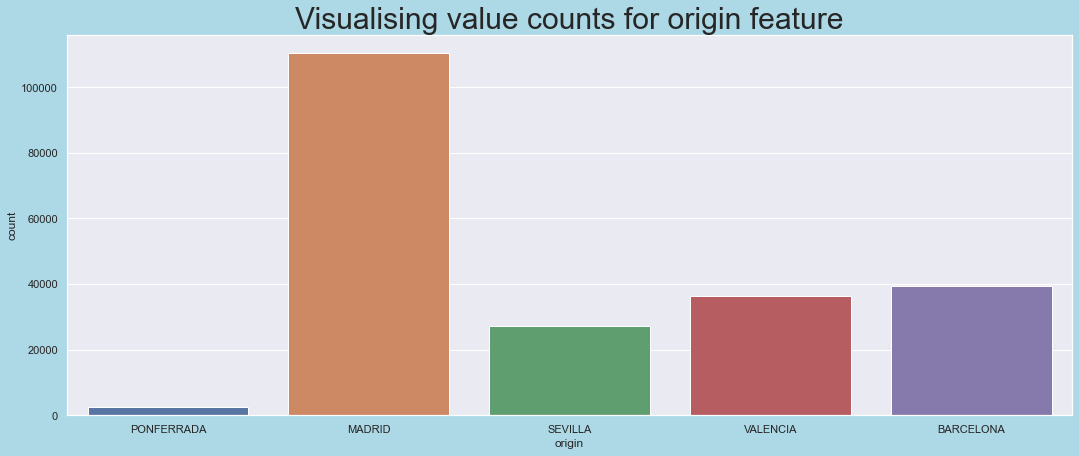

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

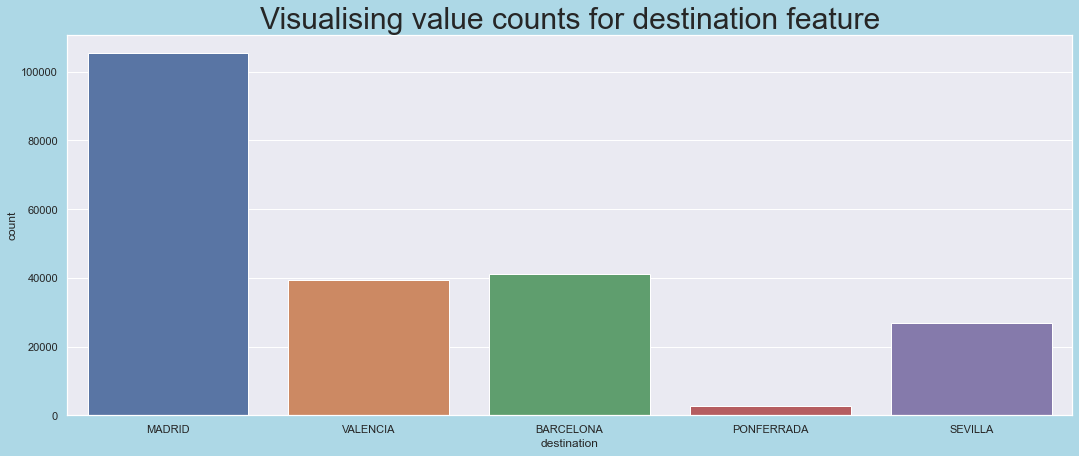

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

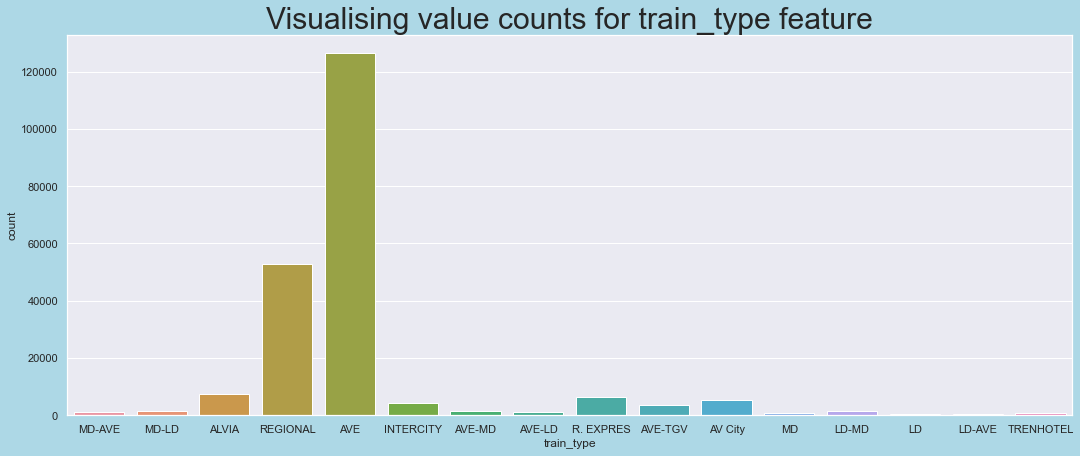

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

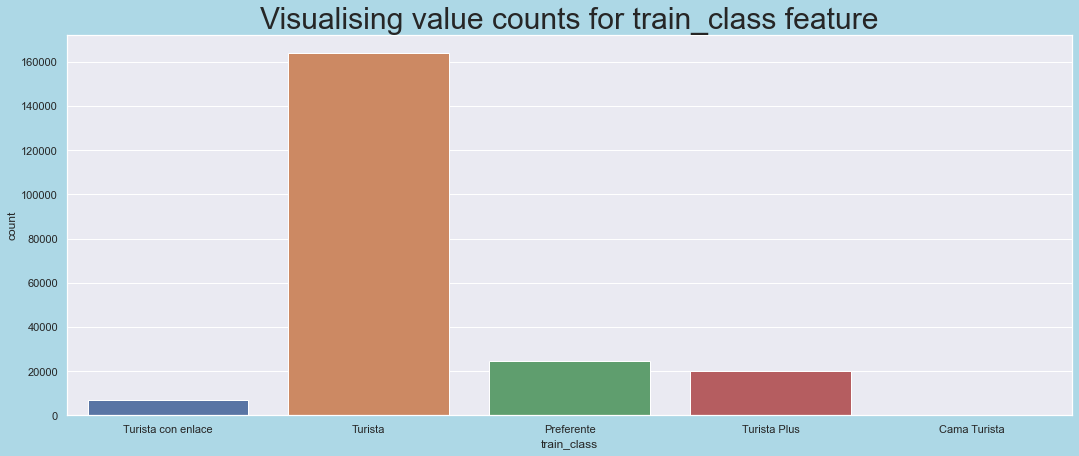

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

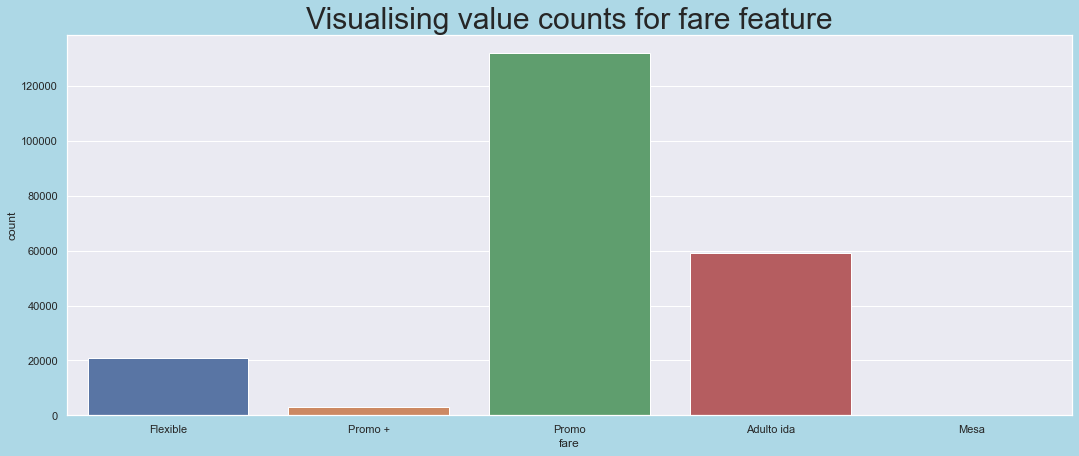

In [24]:
# Value Counts Visualise.

for feature in categorical_features:
    plt.figure(figsize=(18,7))
    sns.countplot(data=df, x=feature)
    plt.title(f'Visualising value counts for {feature} feature', fontsize=30)
    plt.show()

## So from above countplots:

- **MADRID** is the city from where most of the passengers have boarded and have travelled.
- **AVE** is the **train_type** used mostly by passengers for their travel followed by **Regional, Alvia**.
- **Turista** is mostly used **train_class** in general.
- **Promo** is mostly used for **fare** followed by **Adulto ida, Flexible**.

## Categorical features countplot on price feature

What is the price of the features used by the passengers?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

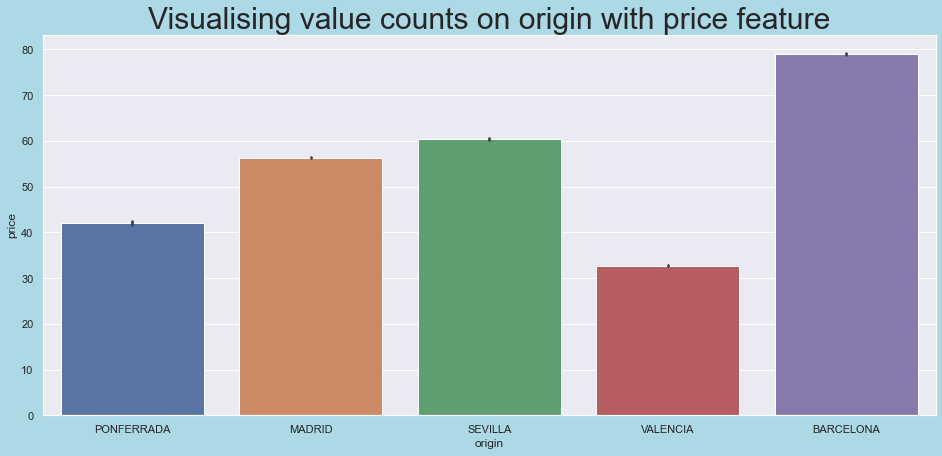

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

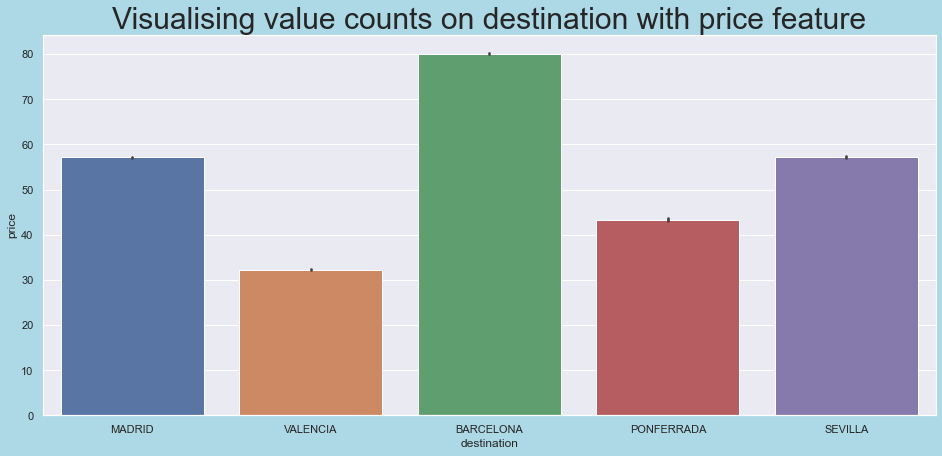

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

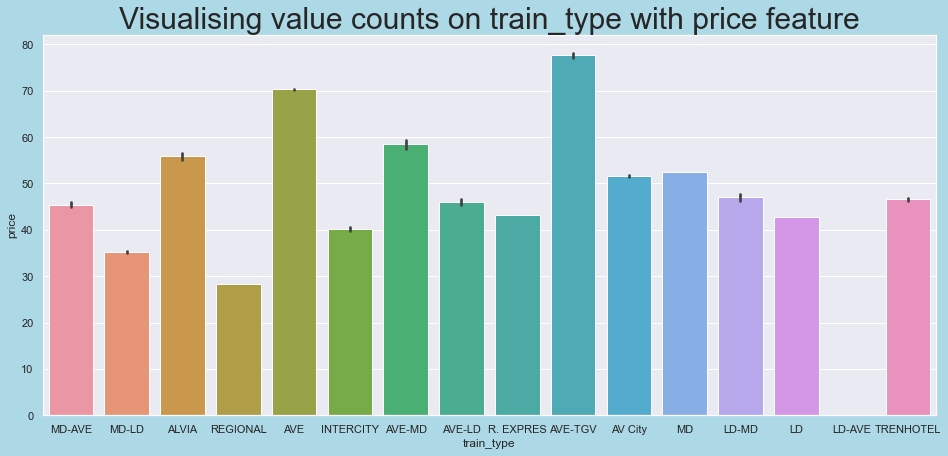

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

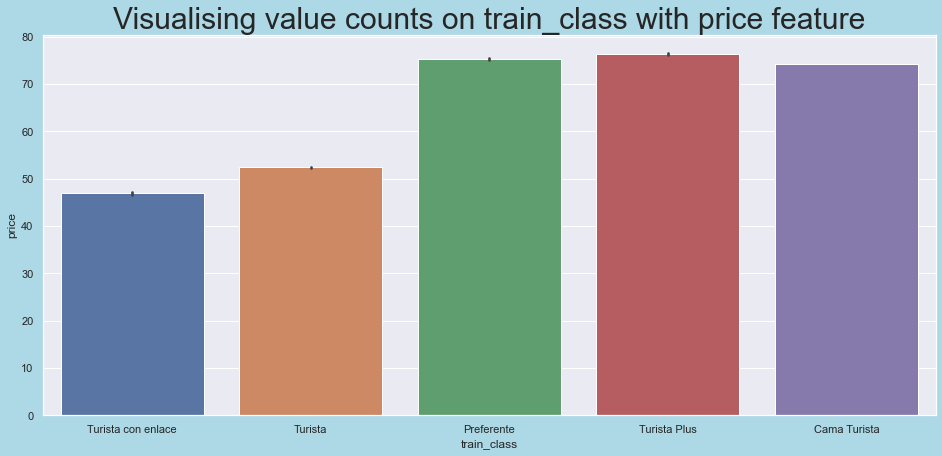

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

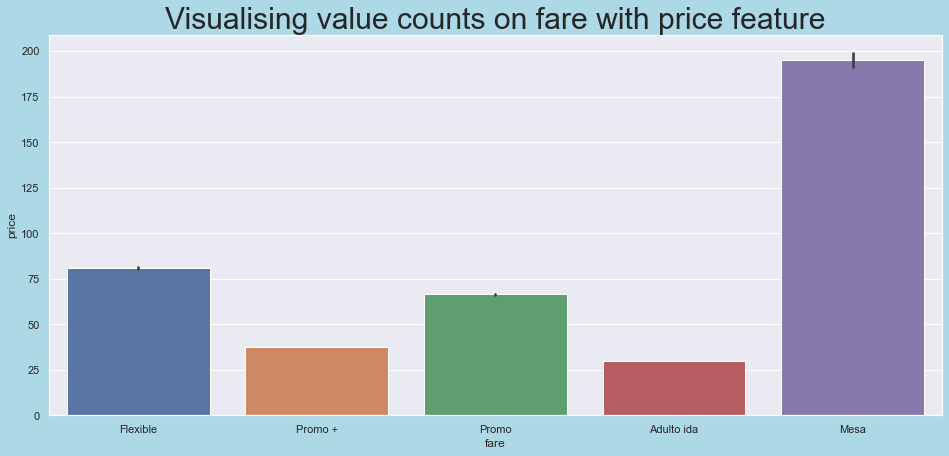

In [25]:
## countplot on categorical feature with price feature.

for feature in categorical_features:
    plt.figure(figsize=(16,7))
    sns.barplot(data=df, x=feature, y='price')
    plt.title(f'Visualising value counts on {feature} with price feature', fontsize=30)
    plt.show()

## Catplots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

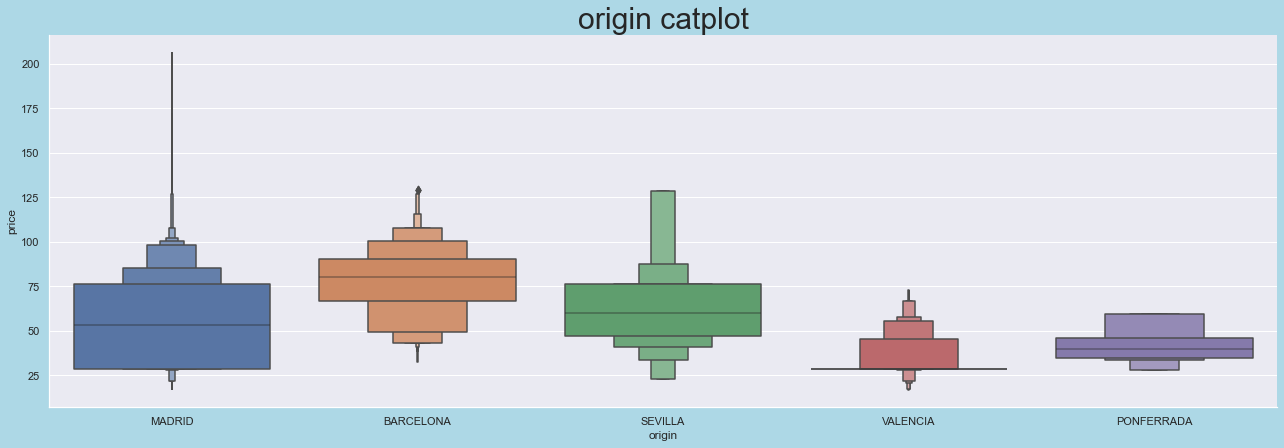

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

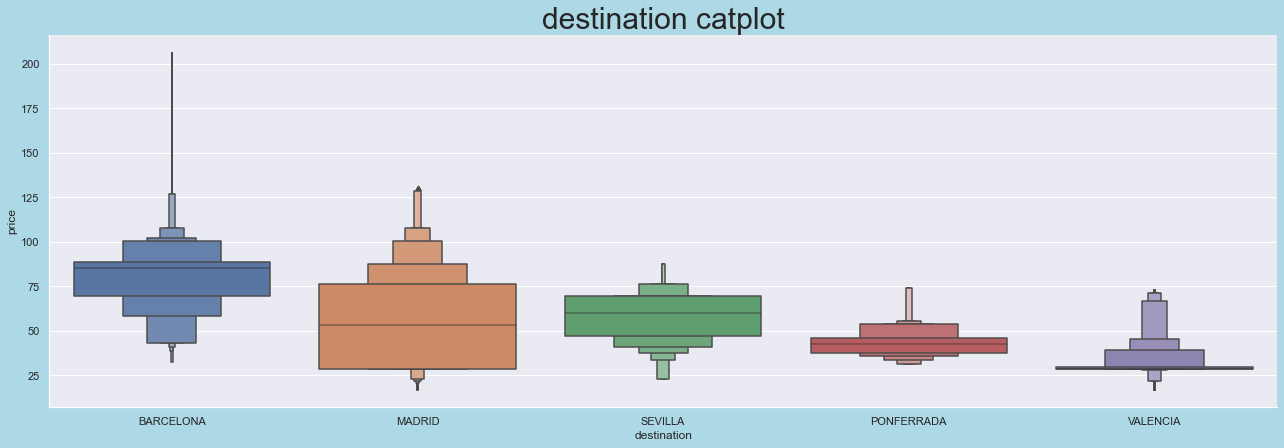

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

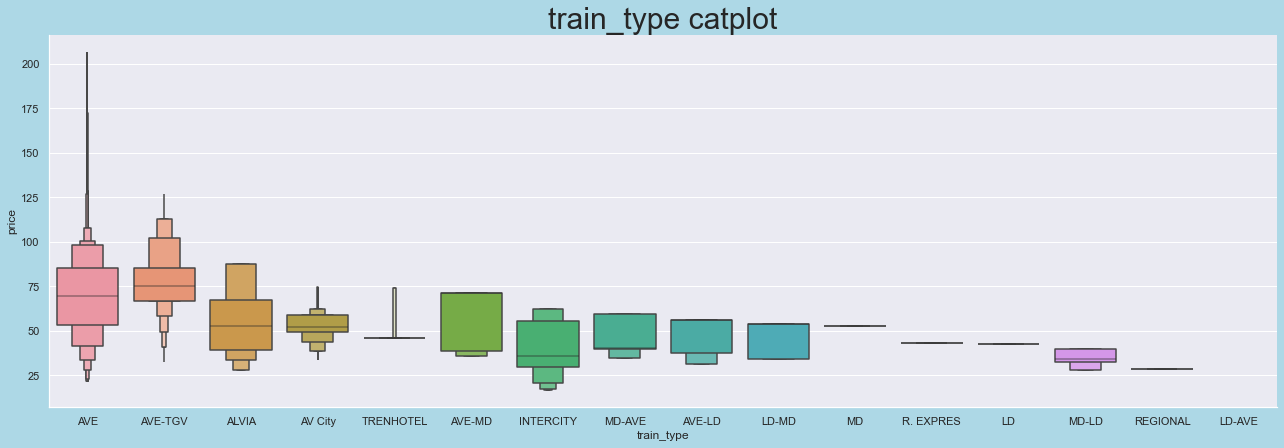

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

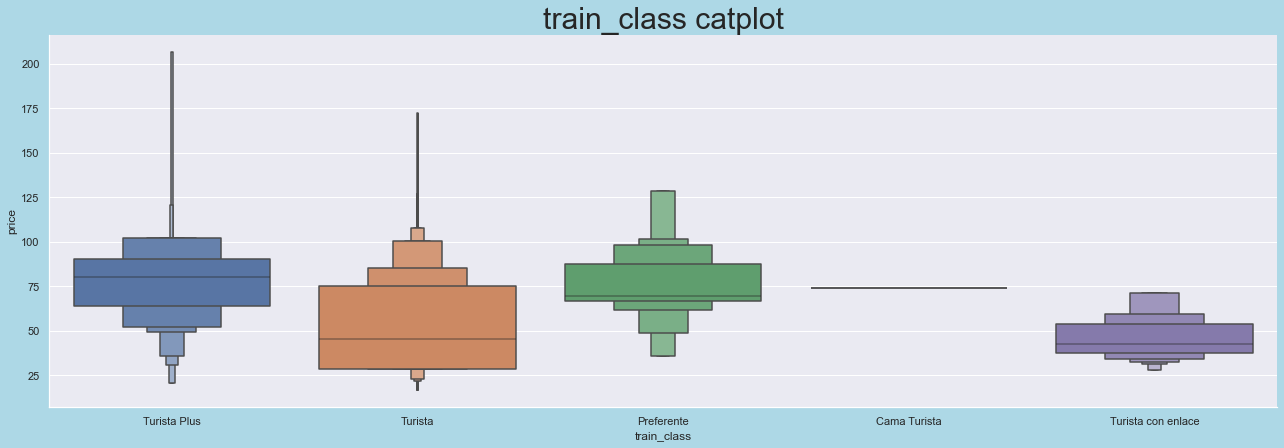

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

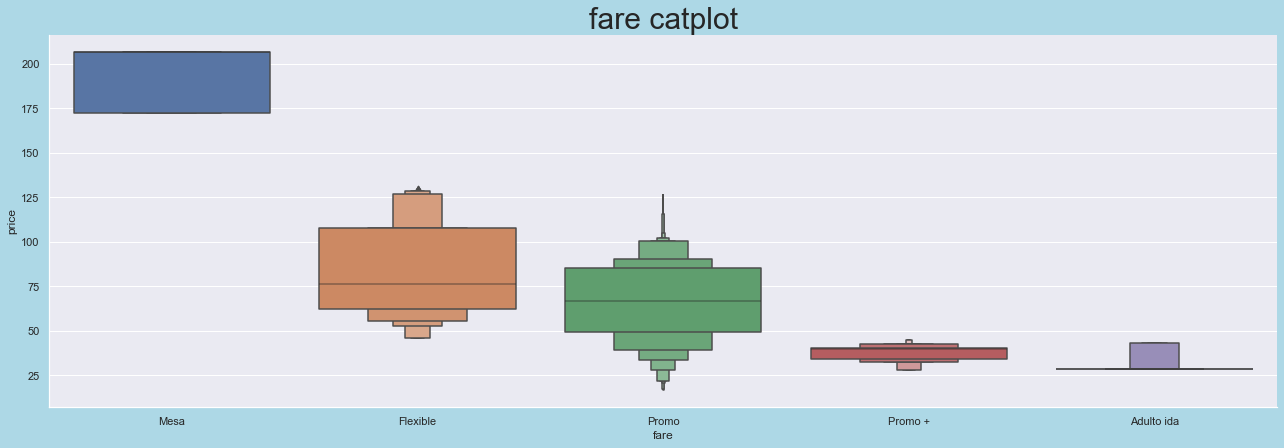

In [26]:
## Checking highest price on the feature using catplot. 

for feature in categorical_features:
    sns.catplot(y='price', x=feature, data = df.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)
    plt.title(f'{feature} catplot', fontsize=30)
    plt.show()

## Conclusion:

- **Barcelona** has the highest ticket price.
- **AVE and AVE-TGV** has highest price for their **train type** in general.
- **Turista Plus** has the highest price for their **train class**.
- **Mosa** has the highest fare.

## Handling NULL values

In [27]:
## Replacing price NAN values with 0.
df['price'].fillna(0, inplace = True)

# Replacing fare
df.loc[(df['price']==0) & (df['fare'] == 'Promo'), 'price'] = df[df['fare'] == 'Promo']['price'].median()
df.loc[(df['price']==0) & (df['fare'] == 'Adulto ida'), 'price'] = df[df['fare'] == 'Adulto ida']['price'].median()
df.loc[(df['price']==0) & (df['fare'] == 'Flexible'), 'price'] = df[df['fare'] == 'Flexible']['price'].median()
df.loc[(df['price']==0) & (df['fare'] == 'Promo +'), 'price'] = df[df['fare'] == 'Promo +']['price'].median()
df.loc[(df['price']==0) & (df['fare'] == 'Mesa '), 'price'] = df[df['fare'] == 'Mesa']['price'].median()

In [28]:
## Dropping the NAN values.
df.dropna(inplace=True)

In [29]:
df

,origin,destination,train_type,price,train_class,fare,start_month,start_day,start_hours,start_minutes,end_month,end_day,end_hours,end_minutes
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,6,2,15,0,6,2,19,42
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,6,2,17,15,6,2,23,3
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,6,2,17,15,6,2,23,10
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,6,2,17,15,6,2,22,14
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,6,2,18,55,6,2,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215904,MADRID,SEVILLA,AVE,47.30,Turista,Promo,6,1,17,0,6,1,19,38
215905,MADRID,SEVILLA,AVE,47.30,Turista,Promo,6,1,18,0,6,1,20,32
215906,MADRID,SEVILLA,AVE,47.30,Turista,Promo,6,1,19,0,6,1,21,38
215907,MADRID,SEVILLA,AVE,47.30,Turista,Promo,6,1,20,35,6,1,23,15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

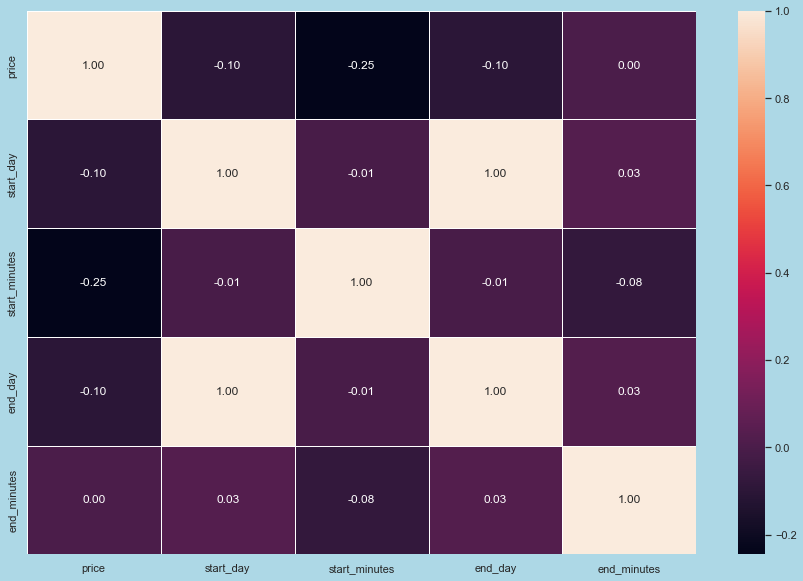

In [30]:
## Cor-relation between features

plt.figure(figsize=(15,10))
sns.heatmap(df[continuous_features].corr(),annot=True,linewidth=0.5,fmt='0.2f')

## Encoding...........

In [31]:
# OneHotEncoding using pd.get_dummies

encoder = pd.get_dummies(df[categorical_features], drop_first=True)

df[encoder.columns] = encoder

<IPython.core.display.Javascript object>

In [32]:
# Dropping the Categorical Columns

df.drop(categorical_features, axis=1, inplace=True)
df.head()

,price,start_month,start_day,start_hours,start_minutes,end_month,end_day,end_hours,end_minutes,origin_MADRID,...,train_type_REGIONAL,train_type_TRENHOTEL,train_class_Preferente,train_class_Turista,train_class_Turista Plus,train_class_Turista con enlace,fare_Flexible,fare_Mesa,fare_Promo,fare_Promo +
0,59.50,6,2,15,0,6,2,19,42,0,...,0,0,0,0,0,1,1,0,0,0
1,34.65,6,2,17,15,6,2,23,3,0,...,0,0,0,0,0,1,0,0,0,1
2,39.95,6,2,17,15,6,2,23,10,0,...,0,0,0,0,0,1,0,0,0,1
3,40.60,6,2,17,15,6,2,22,14,0,...,0,0,0,0,0,1,0,0,0,1
4,27.90,6,2,18,55,6,2,23,3,0,...,0,0,0,1,0,0,0,0,1,0


## Train-Test Split

In [33]:
X = df.drop(columns=['price'])
y = df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection.......

In [35]:
feat_selection = ExtraTreesRegressor()
feat_selection.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(feat_selection.feature_importances_)

[0.00000000e+00 2.84264590e-02 1.99101470e-02 1.08955453e-02
 0.00000000e+00 2.85760795e-02 2.09353736e-02 1.23854750e-02
 1.74174963e-03 4.83997661e-04 4.78862381e-02 5.09318789e-02
 2.80190589e-03 6.15917869e-04 4.68847757e-02 6.18087090e-02
 5.76882074e-04 5.32328175e-02 4.04133613e-04 1.66842001e-04
 1.50467300e-02 3.95282261e-03 7.03243380e-05 6.15223755e-04
 1.14890402e-05 9.45598352e-04 3.05176989e-04 2.53083085e-05
 6.29787982e-05 4.43483472e-01 2.73844890e-03 2.76990481e-02
 2.97547673e-02 6.02075532e-03 1.20292993e-03 5.36690514e-02
 5.23585028e-04 2.52065983e-02 7.63851245e-07]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

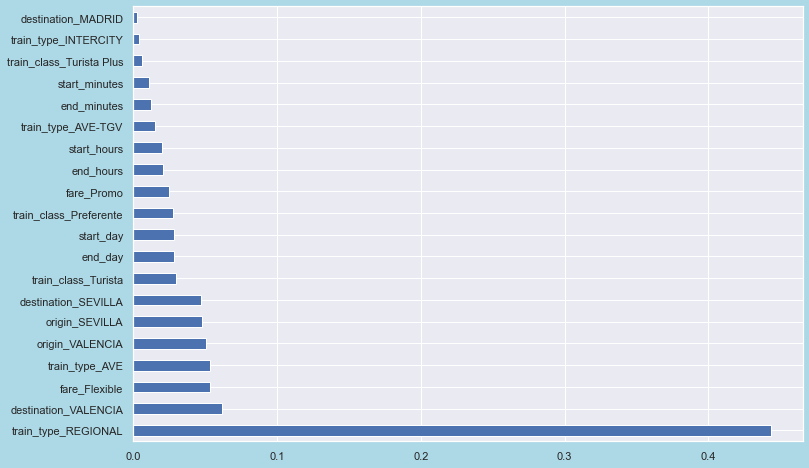

In [37]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(feat_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [38]:
## Random Forest Algorithm. 

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Train-data score: ', rf.score(X_train,y_train))
print('Test-data score: ', rf.score(X_train,y_train))

Train-data score:  0.9813489399488716
Test-data score:  0.9813489399488716


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

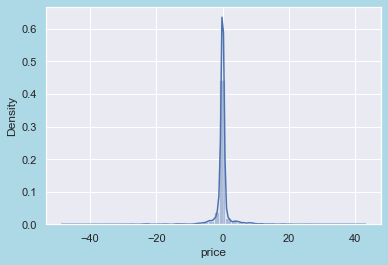

In [39]:
sns.distplot(y_test - y_pred)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

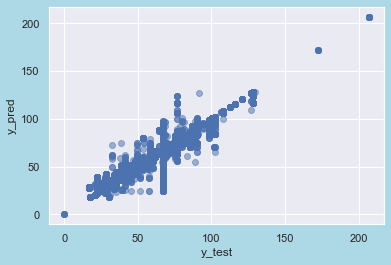

In [40]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [41]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0731584127357168
MSE: 12.33388497620024


<IPython.core.display.Javascript object>

RMSE: 3.5119631228417307


In [42]:
metrics.r2_score(y_test, y_pred)

0.9801941955887395